In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# Lesson 6: Supervised Machine Learning

## Topics

- Exploring data using visualization tools
- Splitting data into training and test sets
- Creating models to predict attributes based on given properties

In previous weeks, you have used clustering techniques to learn features in datasets and images.  Clustering analysis and the k-means algorithm is an example of *unsupervised learning*, where the models created do not know what the inputs mean.

Now, we will explore machine learning in the more popular sense of the term: given some observations (data points) and their categories or labels, can we guess the label of a new, unseen data point?  We will be exploring a class of methods for automatically building mathematical models based on training data.

## Simple Example

As a small example, we will load in a dataset of points that are labeled either blue (`0`) or red (`1`).  We will try to determine some way of distinguishing between these points, such that if we wanted to classify any future unknown points we could do so based on the data we have already seen.

In [2]:
dataset = pd.DataFrame(np.loadtxt("linear_pts.txt"), columns=["Label", "x", "y"])
dataset

Label         x         y
0      0.0  0.702703  0.827337
1      0.0  0.905405  0.608754
2      1.0  0.270270  0.631849
3      1.0  0.932432  0.231274
4      1.0  0.918919  0.449426
..     ...       ...       ...
145    1.0  0.581081  0.448926
146    1.0  0.837838  0.453948
147    0.0  0.324324  0.928975
148    0.0  0.391892  0.880434
149    0.0  0.000000  1.000000

[150 rows x 3 columns]

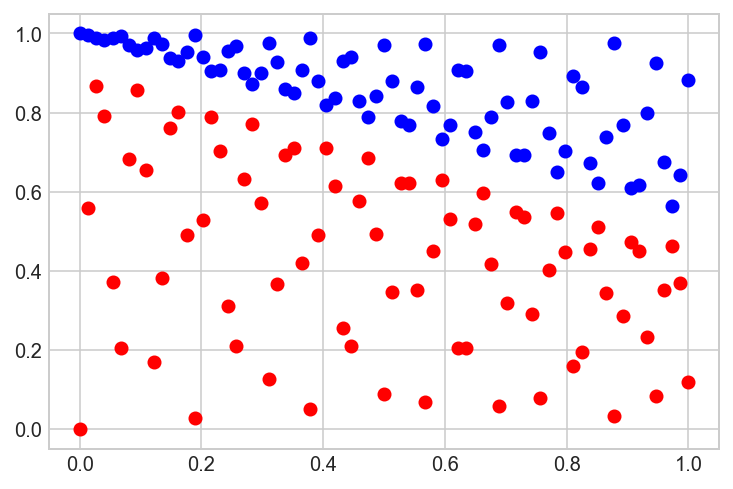

In [3]:
blue_points = dataset[dataset['Label'] == 0]
red_points = dataset[dataset['Label'] == 1]

plt.plot(blue_points['x'], blue_points['y'], 'bo')
plt.plot(red_points['x'], red_points['y'], 'ro')

Can we classify the points here based on their *x-y* values?  There seems to be one obvious way to distinguish between them, lets try manually finding the line that divides red or blue.

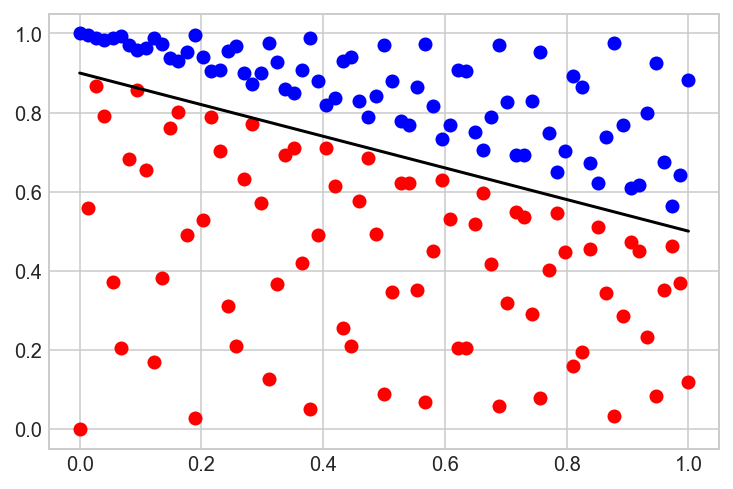

In [6]:
x = np.linspace(0, 1, 100)
y = 0 * x + 0
a = -0.4
b = 0.9
y = a*x + b
plt.plot(blue_points['x'], blue_points['y'], 'bo')
plt.plot(red_points['x'], red_points['y'], 'ro')
plt.plot(x, y, 'k')

Obviously trying to find the line by hand isn't ideal, let's use some functions in `scikit-learn` to find the splitting line for us.  Here we are using what is called a *support-vector machine* (SVM), a method of learning the line that splits the data as cleanly as possible.

In [5]:
from sklearn.svm import LinearSVC
model = LinearSVC(C=20)
model.fit(dataset[['x', 'y']], dataset['Label'])

model_m = -model.coef_[0,0] / model.coef_[0,1]
model_b = -model.intercept_[0] / model.coef_[0,1]

print(f"Splitting line: {np.round(model_m, 2)}x + {np.round(model_b, 2)}")

Splitting line: -0.42x + 0.93


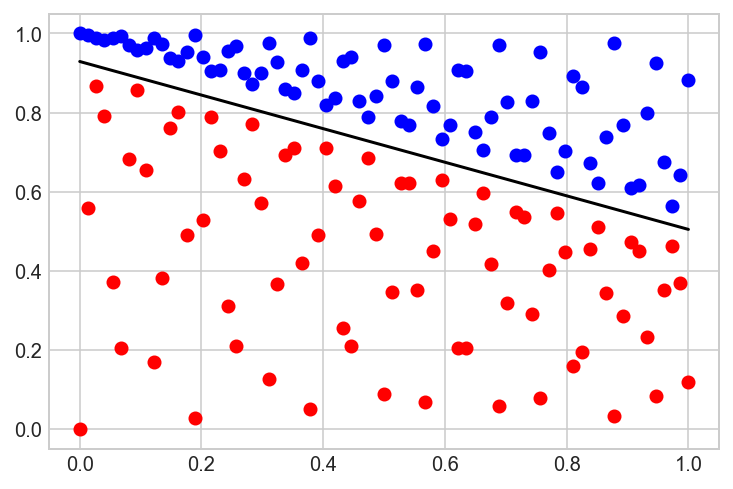

In [7]:
x = np.linspace(0, 1, 100)
y = model_m * x + model_b

plt.plot(blue_points['x'], blue_points['y'], 'bo')
plt.plot(red_points['x'], red_points['y'], 'ro')
plt.plot(x, y, 'k')

Any model that splits the data like this is called a *linear classifier*, and are amongst the simplest classifiers used in machine learning.

## Non-Linear Data

So that worked well for a simple dataset, but lets try looking at another one:

In [8]:
dataset = pd.DataFrame(np.loadtxt("nonlinear_pts.txt"), columns=["Label", "x", "y"])
dataset

Label         x         y
0      1.0  0.863599 -0.977481
1      1.0  1.972578 -0.827039
2      0.0 -0.373777  0.714480
3      1.0  1.487864  1.495121
4      1.0  0.783129  0.089468
..     ...       ...       ...
195    0.0 -0.811414 -0.788148
196    1.0 -0.514802  0.789445
197    0.0 -1.372034 -0.658142
198    0.0  0.517175 -1.173691
199    0.0  1.584197 -1.960649

[200 rows x 3 columns]

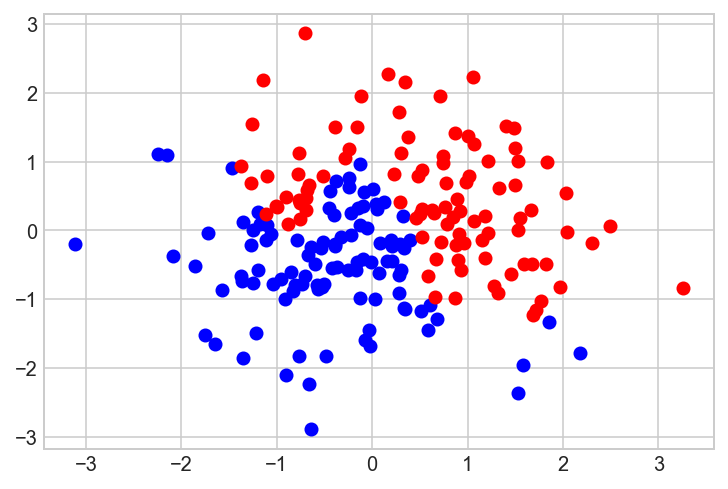

In [9]:
blue_points = dataset[dataset['Label'] == 0]
red_points = dataset[dataset['Label'] == 1]

plt.plot(blue_points['x'], blue_points['y'], 'bo')
plt.plot(red_points['x'], red_points['y'], 'ro')

Here it becomes difficult to split the dataset using only one line.  So what can we do?  One thing we can try is to add more "lines" to split the data on, to do so we can use a MLP classifier.

In [10]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(10, 15, 20), solver='lbfgs')
model.fit(dataset[['x', 'y']], dataset['Label'])

model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 15, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

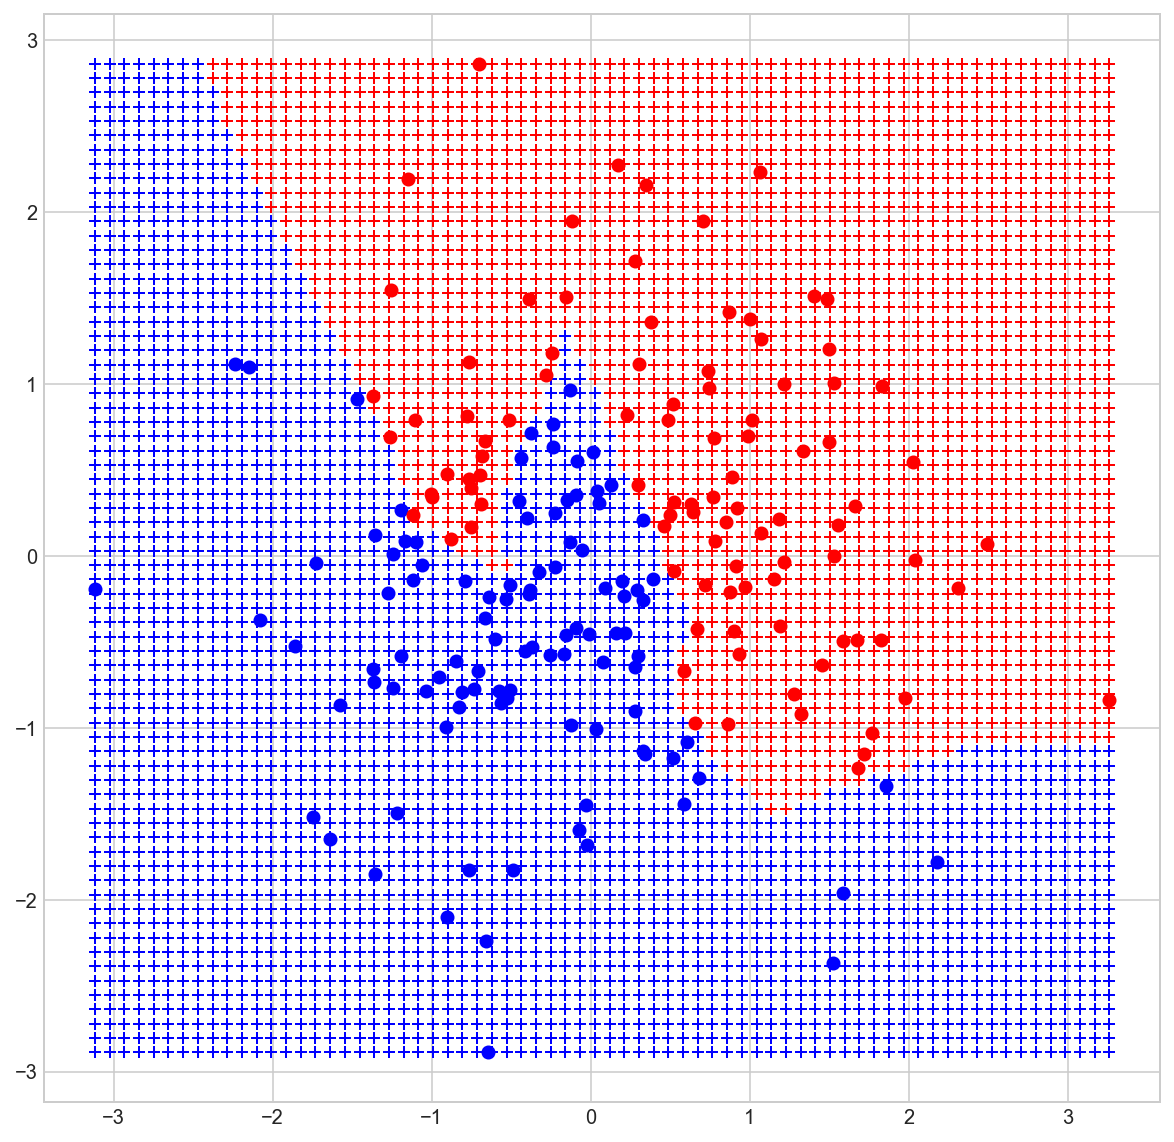

In [11]:
plt.figure(figsize=(10,10))
n = 70
xx, yy = np.meshgrid(np.linspace(dataset['x'].min(), dataset['x'].max(), n), 
                     np.linspace(dataset['y'].min(), dataset['y'].max(), n))
xx = xx.flatten()
yy = yy.flatten()

pts = np.array([xx, yy]).T
pred = model.predict(pts)

zval = pts[pred == 0]
oval = pts[pred == 1]

plt.plot(zval[:,0], zval[:,1], 'b+')
plt.plot(oval[:,0], oval[:,1], 'r+')

plt.plot(blue_points['x'], blue_points['y'], 'bo')
plt.plot(red_points['x'], red_points['y'], 'ro')

While this is a bit of a simplification, combining multiple linear classifiers like this is the basis of how a neural network operates.  By combining many linear classifiers into layers, we are able to approximate much more interesting splitting functions than just a line.

## Training/Testing Split

Usually to assess the performance of our models, the dataset is divided into two parts: a training set and a test set. The first is used to train the system, while the second is used to evaluate the learned or trained model.  
    
We are going to use `sklearn.model_selection.train_test_split()` to split the original linear dataset we had before.

In [12]:
from sklearn.model_selection import train_test_split
linear = pd.DataFrame(np.loadtxt("linear_pts.txt"), columns=["Label", "x", "y"])

A common splitting choice is to take $2/3$ of your original data set as the training set, while the $1/3$ that remains will compose the test set. You should select this proportion by assigning the variable `s` and setting the argument `test_sizes = s` in`sklearn.model_selection.train_test_split()`.

In [13]:
s = 0.33

We can split the arrays `inputs` and `labels` into training data `(in_train, out_train)` and test data `(in_test, out_test)`

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
coords_train, coords_test, labels_train, labels_test = train_test_split(linear[['x', 'y']], linear['Label'], test_size=s)

In [15]:
print(f"Number of training elements: {len(coords_train)}")
print(f"Number of test elements: {len(coords_test)}")

Number of training elements: 100
Number of test elements: 50


Here we will use a different model called *logistic regression*.  This is a linear classifier like the SVM we have seen before, but instead of finding an optimal split line it attempts to assign weights to the features such that adding up the weighted features gives us a value between 0 and 1 (and whichever it is closer to is our prediction).

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(tol=0.001)
model.fit(coords_train, labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

With the trained model we can now run predictions on our testing data.  Here we have plotted the prediction space, as well as all points in the testing set as well as their predictions.  Predictions that do not match the true values will have an 'x' on them.

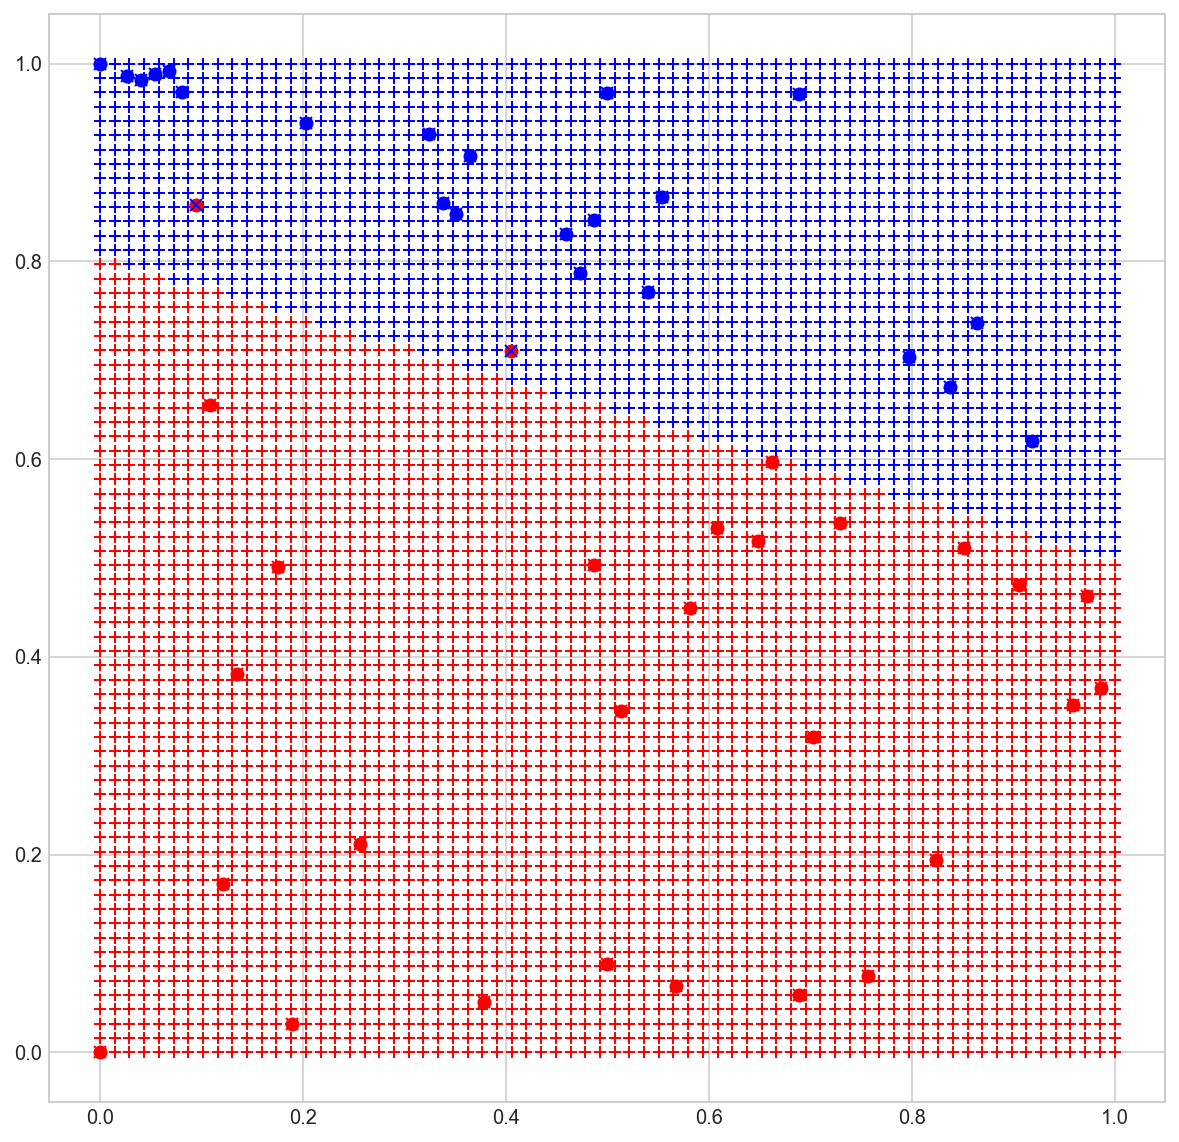

In [17]:
plt.figure(figsize=(10,10))

# Plot prediction space
n = 70
xx, yy = np.meshgrid(np.linspace(0, 1, n), np.linspace(0, 1, n))
xx = xx.flatten()
yy = yy.flatten()

pts = np.array([xx, yy]).T
pred = model.predict(pts)

zval = pts[pred == 0]
oval = pts[pred == 1]

plt.plot(zval[:,0], zval[:,1], 'b+')
plt.plot(oval[:,0], oval[:,1], 'r+')

pred = model.predict(coords_test)

# Plot points
blue_points = coords_test[labels_test == 0]
red_points = coords_test[labels_test == 1]
blue_points_pred = coords_test[pred == 0]
red_points_pred = coords_test[pred == 1]

plt.plot(blue_points['x'], blue_points['y'], 'bo')
plt.plot(red_points['x'], red_points['y'], 'ro')
plt.plot(blue_points_pred['x'], blue_points_pred['y'], 'bx')
plt.plot(red_points_pred['x'], red_points_pred['y'], 'rx')

## Predicting Pokemon legendary status

Now that we have looked at some simple examples, lets look at a more interesting application of machine learning techniques.  We will be working with a dataset containing various Pokemon and their attributes (HP, Attack, etc.) and predicting if they are *legendary* or not.

We will explore multiple models for machine learning and see how well they will work on our data.

Lets start off with loading the data, this particular dataset is from [Kaggle](https://www.kaggle.com/abcsds/pokemon).

In [18]:
df = pd.read_csv("pokemon.csv")

In the dataset, each row represents a Pokemon. How many Pokemon are in our dataset? How many features are in this dataset?

In [29]:
print("Number of Pokemon: ", len(df))
print("Number of features: ", len(df.axes[1]) - 2)

Number of Pokemon:  800
Number of features:  11



You can inspect the first few lines of your data using `df.head()`:

In [22]:
df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

Define an NumPy array `labels`, such that it contains whether a given Pokemon is legendary or not. The $i$th entry of y denotes whether the $i$th Pokemon is legendary (`True`) or not (`False`). We will later use a classification algorithm to help predict if a Pokemon is legendary.

In [20]:
df['Legendary']

0      False
1      False
2      False
3      False
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Legendary, Length: 800, dtype: bool

In [45]:
labels = np.array(df['Legendary'])

Not every classifier can work with string or boolean types. Instead of having the array `y` as booleans, we can replace `True` with 1 and `False` with 0.

In [46]:
labels = labels.astype('int64')

What are the features in our data that can be used to determine the legendary status of a Pokemon?  We are unable to directly use text in our classification, so we can ignore those features here.

Save these features as a list in the variable `features`. Hint: there are 7 features.

In [48]:
features = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

Lets create a new array containing only the features we have picked above.  We will be directly using these as input to our models.

In [49]:
inputs = df[features] # pick the features
inputs = inputs.values # convert to an array
inputs

array([[318,  45,  49, ...,  65,  65,  45],
       [405,  60,  62, ...,  80,  80,  60],
       [525,  80,  82, ..., 100, 100,  80],
       ...,
       [600,  80, 110, ..., 150, 130,  70],
       [680,  80, 160, ..., 170, 130,  80],
       [600,  80, 110, ..., 130,  90,  70]])

Now, split the dataset as we have done before into a training and testing dataset.  To be very clear with our variables here, name the inputs as `in_test`, `in_train`; and the outputs as `out_test`, `out_train`.  You can use the same $1/3$ - $2/3$ split as above.

### Logistic regression

Now that we have a dataset to train our model and a dataset to validate our model, we need to construct a model.  Use the logistic regression model you have seen above.

Use all the default parameters for now.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Using this instance of the model, let's use the training data to train the model.
Use `model.fit()` to train the model, as we have done before.

## Model Prediction

We now have a trained model and we can begin using it to make predictions. Recall that we want to use our model to predict whether a Pokemon is legendary or not.

Use the model to predict whether the Pokemon in the test dataset `in_test` are legendary.
You can use the model to make predictions using the predict function `model.predict()`.
Save this as `out_predict`.

In [0]:
print(f"We have predicted {out_predict.sum()} legendary Pokemon.")
print(f"There are actually {out_test.sum()} legendary Pokemon.")

#### But, do we know how good our prediction is? How can we measure how good our model is?

One way of determining the performance of our model is using a confusion matrix. A confusion matrix describes the performance of the classification model on a set of test data for which the true values are known. A confusion matrix stores the true positives, false positives, false negatives, and true negatives for our test data.

In [0]:
from sklearn.metrics import confusion_matrix

Let's use the `confusion_matrix` function in sklearn to construct a confusion matrix for our dataset.

In [0]:
cmat = confusion_matrix(out_test, out_predict)

print("Confusion matrix:\n",cmat)

TN, FP, FN, TP = cmat.ravel()

 $$  \text{Confusion matrix} = \left[ \begin{array} {cccc} TN & FP\\ FN&TP \end{array} \right] $$
 
**TN**: Predicted no (not legendary), and the Pokemon is not legendary. (How many non-legendary Pokemon are correctly identified?)

**FP**: Predicted yes (legendary), but the Pokemon is not legendary. (How many non-legendary Pokemon are identified as legendary?)

**FN**: Predicted no (not legendary), but the Pokemon is actually legendary. (How many legendary Pokemon are missed?)

**TP**: Predicted yes (legendary), and the Pokemon is legendary. (How many legendary Pokemon are correctly identified?)

Ideally, we would like large values along the diagonal of the matrix (indicating correct predictions), and small values off the diagonal.

#### There are different "scores" to quantify how good the model is. Here are some of them:

1) **Accuracy**: fraction of correct classification https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(out_test, out_predict)

In [0]:
(out_test == out_predict).sum()/len(out_test)

2) **Precision**: when it predicts yes (legendary), how often is the prediction correct?
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

In [0]:
TP/(TP+FP)

In [0]:
from sklearn.metrics import precision_score

precision_score(out_test, out_predict)

3) **Recall**: when actually yes (legendary), how often is the prediction correct? https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [0]:
TP/(TP+FN)

In [0]:
from sklearn.metrics import recall_score

recall_score(out_test, out_predict)

## Classifying with SVM

Starting with an initial dataset, we learned how to prepare the data, split the data, construct a model, and then use the model using scikit-learn.

Let's try and repeat this experiment now but with the SVM model you have seen at the beginning of class.  Find the recall, precision, and accuracy and compare to the logistic regression model you have done previously.

In [0]:
from sklearn.svm import SVC

Use the `SVC` model here instead of `LinearSVC`.  This gives us slightly better results by not forcing the split line to be "straight".

# Other Models (Extra)

You don't need to implement anything here, but rather here are some other models and simple explanations on how they work if you are interested.

In [0]:
nonlinear = pd.DataFrame(np.loadtxt("nonlinear_pts.txt"), columns=["Label", "x", "y"])
coords_train, coords_test, labels_train, labels_test = train_test_split(nonlinear[['x', 'y']], nonlinear['Label'], test_size=s)

def plot_model(model):
    plt.figure(figsize=(10,10))

    # Plot prediction space
    n = 70
    xx, yy = np.meshgrid(np.linspace(coords_test['x'].min(), coords_test['x'].max(), n),
                         np.linspace(coords_test['y'].min(), coords_test['y'].max(), n))
    xx = xx.flatten()
    yy = yy.flatten()

    pts = np.array([xx, yy]).T
    pred = model.predict(pts)

    zval = pts[pred == 0]
    oval = pts[pred == 1]

    plt.plot(zval[:,0], zval[:,1], 'b+')
    plt.plot(oval[:,0], oval[:,1], 'r+')

    pred = model.predict(coords_test)

    # Plot points
    blue_points = coords_test[labels_test == 0]
    red_points = coords_test[labels_test == 1]
    blue_points_pred = coords_test[pred == 0]
    red_points_pred = coords_test[pred == 1]

    plt.plot(blue_points['x'], blue_points['y'], 'bo')
    plt.plot(red_points['x'], red_points['y'], 'ro')
    plt.plot(blue_points_pred['x'], blue_points_pred['y'], 'bx')
    plt.plot(red_points_pred['x'], red_points_pred['y'], 'rx')

### Nearest Neighbours

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

Perhaps one of the most simplest models that you can create is the Nearest Neighbours classifier.  When training, we just store all data points and their label.  To classify a new point, we find the nearest point in our training set (the nearest neighbour) and return its label.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(coords_train, labels_train)

In [0]:
plot_model(knn)

### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

A decision tree is a way of splitting up the task of classifying a data point into following steps on a flow chart.  Here is an example of a decision tree generated on the chances of your survival on the Titanic. `sibsp` is the number of siblings or spouses you had onboard.

![Decision Tree](decision_tree.png)
<center><small>(Borrowed from https://en.wikipedia.org/wiki/Decision_tree_learning)</small></center>

One issue with decision trees particularly is that they are prone to overfitting, or that they fit the training data *too well*, and do not generalise when given new unseen data points.  A way to get around this is to train many "shallow" decision trees (a forest of trees, if you will) and take a majority vote when classifying new points.

In [0]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(coords_train, labels_train)

In [0]:
plot_model(forest)

### Adaptive Boosting (Adaboost)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

Adaboost is formulated from a similar idea as the random forest classifier, by taking many *weak* classifiers and weighing them by the probability they are correct or not, we can create one strong classifier.  Note that the weak classifiers should be better than random guessing for the Adaboost model to be effective.

In [0]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(coords_train, labels_train)

In [0]:
plot_model(adaboost)